<font color='red'>Reviews header table extracted from Metacritic:</font>

In [36]:
import numpy as np
import langdetect
import matplotlib.pyplot as plt
import pandas as pd
import re
from utils import *
#Reading Data
df = pd.read_csv('ratings.csv', lineterminator='\n')
df.head()

,Name,Date,Rating,Review
0,ToastAzazine,"Dec 11, 2020",10.0,Console players giving a score of 0 on the PC...
1,Perokar,"Dec 11, 2020",10.0,Play on ps5 30 hours in game and all wonderfu...
2,Garypiel,"Dec 11, 2020",10.0,"dont bother who gave 0 because of the bugs, t..."
3,Agrajag,"Jan 21, 2021",4.0,"Feel betrayed, and not because I was on the h..."
4,sandcube,"Dec 11, 2020",10.0,"There are some bugs, yes. But can anyone with..."


<font color='red'>Reviews Analysis by grade:</font>

In [37]:
# Split data by reviews types
df = df[['Rating', "Review"]]
pos = print(f'Positive rating >= 7:  {len(df.loc[df["Rating"] >= 7])}')
print(f'Negative rating <= 5: {len(df.loc[df["Rating"] <= 5])}')
print(f'5 < Neutral rating < 7:  {len(df.loc[(df["Rating"] > 5) & (df["Rating"] < 7)])}')

Positive rating >= 7:  2913
Negative rating <= 5: 1772
5 < Neutral rating < 7:  115


<font color='red'>Reviews cleaned sample size:</font>

In [38]:
#Excluding big reviews (more than 3.000 char)
long_reviews = df.loc[df['Review'].str.len() > 3000].index
df.drop(long_reviews, inplace=True)
print(len(df.loc[df["Rating"] < 100]))

4662


<font color='red'>Most repeated positive words reviews</font>

('game', 4712) ('bugs', 1187) ('story', 977) ('good', 738) ('world', 620) 

('great', 610) ('play', 559) ('PC', 499) ('hours', 499) ('people', 483) 

('played', 476) ('lot', 468) ('playing', 457) ('Cyberpunk', 398) ('bugs,', 394) 

('characters', 336) ('time', 332) ('experience', 324) ('main', 323) ('amazing', 301) 

('love', 298) ('better', 289) ('feel', 278) ('gameplay', 277) ('RPG', 277) 

('story,', 274) ('city', 273) ('open', 271) ('think', 270) ('CDPR', 265) 



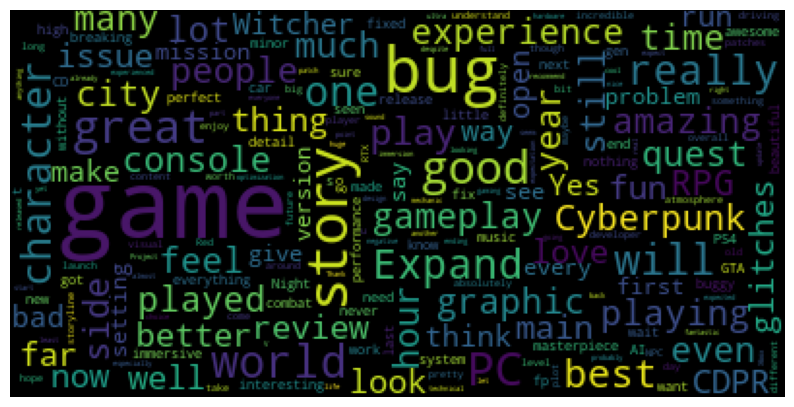

In [39]:

#Analyszing data of positive reviews
positive_reviews=df[df['Rating']>=7]
russian_characters = re.compile(r"[\u0400-\u052F]")
cleaned_reviews = []
#Cleaning data so there is only Enlgish
for review in positive_reviews['Review']:
    try:
        lang = langdetect.detect(review)
    except:
        continue 
    if lang == "en":
      cleaned_reviews.append(review)
from wordcloud import WordCloud, STOPWORDS
words = []
#Splitting reviews strings in tokes(words)
for value in cleaned_reviews:
    for word in re.split(" ", value):
        if word:
            words.append(word)
#Getting a dictionary with all reviews words
repeated_words = word_count(words)
#Opening a file with words that are not important for analysis
entries =  set(open('words.txt').read().split())
#removing all prepositions, pronounms and words that should be analysed
entries_to_remove(entries, repeated_words)
repeated_words = (sorted(repeated_words.items(),reverse=True, key=lambda item: item[1]))
#Priting list with the most repeated words
rows = int(len(repeated_words)/5)
for i in range(6):
    sublist = repeated_words[i*5 : i*5 + 5]
    sublist.append("\n")
    print(*sublist)
#Cloud with positive reviews words
word_cloud(cleaned_reviews,'black','Most Used Words')

<font color='red'>Most repeated negative words reviews</font>

('game', 2710) ('world', 430) ('bugs', 408) ('story', 300) ('AI', 297) 

('bad', 275) ('good', 269) ('open', 256) ('Cyberpunk', 255) ('CDPR', 240) 

('years', 229) ('play', 221) ('people', 218) ('time', 209) ('feels', 203) 

('city', 198) ('****', 185) ('feel', 176) ('better', 161) ('bugs,', 154) 

('lot', 151) ('character', 150) ('gameplay', 149) ('2077', 147) ('hours', 144) 

("doesn't", 142) ('RPG', 141) ('playing', 141) ('looks', 139) ('main', 137) 



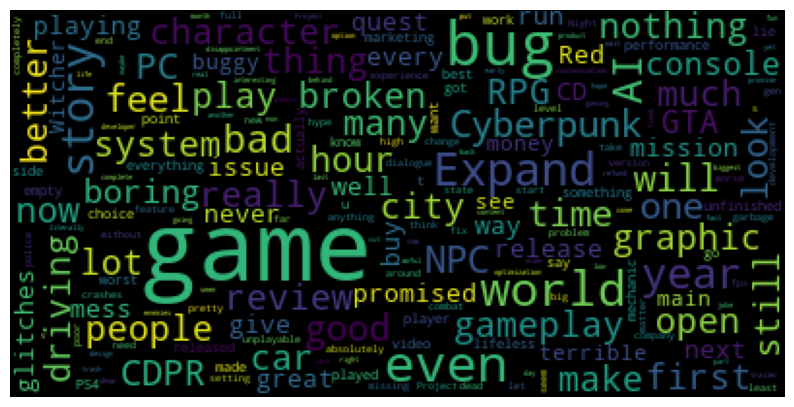

In [40]:
#Analyszing data of negative reviews
negative_reviews=df[df['Rating']<=5]
russian_characters = re.compile(r"[\u0400-\u052F]")
cleaned_reviews = []
#Cleaning data so there is only Enlgish
for review in negative_reviews['Review']:
    try:
        lang = langdetect.detect(review)
    except:
        continue 
    if lang == "en":
      cleaned_reviews.append(review)
from wordcloud import WordCloud, STOPWORDS
words = []
#Splitting reviews strings in tokes(words)
for value in cleaned_reviews:
    for word in re.split(" ", value):
        if word:
            words.append(word)
#Getting a dictionary with all reviews words
repeated_words = word_count(words)
#Opening a file with words that are not important for analysis
entries =  set(open('words.txt').read().split())
#removing all prepositions, pronounms and words that should be analysed
entries_to_remove(entries, repeated_words)
repeated_words = (sorted(repeated_words.items(),reverse=True, key=lambda item: item[1]))
#Priting list with the most repeated words
rows = int(len(repeated_words)/5)
for i in range(6):
    sublist = repeated_words[i*5 : i*5 + 5]
    sublist.append("\n")
    print(*sublist)
#Cloud with positive reviews words
word_cloud(cleaned_reviews,'black','Most Used Words')